In [1]:
import pandas as pd
import numpy as np
import time
import datetime
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Actualizar los datos (URL)

url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/data.csv'

df = pd.read_csv(url)
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,24/11/2020,24,11,2020,246,17,Afghanistan,AF,AFG,38041757.0,Asia,6.713675
1,23/11/2020,23,11,2020,252,8,Afghanistan,AF,AFG,38041757.0,Asia,6.655844
2,22/11/2020,22,11,2020,154,12,Afghanistan,AF,AFG,38041757.0,Asia,6.203709
3,21/11/2020,21,11,2020,232,25,Afghanistan,AF,AFG,38041757.0,Asia,6.130106
4,20/11/2020,20,11,2020,282,5,Afghanistan,AF,AFG,38041757.0,Asia,5.672714
...,...,...,...,...,...,...,...,...,...,...,...,...
57635,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
57636,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
57637,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
57638,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [3]:
df = df[df['countriesAndTerritories'].isin(['Honduras'])] 
df = df.loc[:,['dateRep','cases','countriesAndTerritories']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%d/%m/%Y'
date = df['dateRep']
df['dateRep'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("01/01/2020", FMT)).days)

df

,dateRep,cases,countriesAndTerritories
24075,328,480,Honduras
24076,327,0,Honduras
24077,326,947,Honduras
24078,325,0,Honduras
24079,324,0,Honduras
...,...,...,...
24326,77,1,Honduras
24327,76,2,Honduras
24328,75,3,Honduras
24329,73,1,Honduras


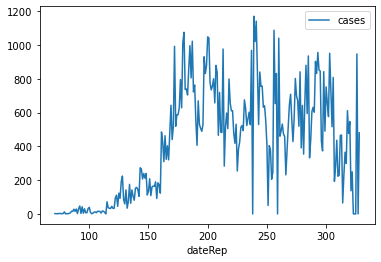

In [4]:
df.plot(x ='dateRep', y='cases')

In [5]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos
print(x,y)

[328, 327, 326, 325, 324, 323, 322, 321, 320, 319, 318, 317, 316, 315, 314, 313, 312, 311, 310, 309, 308, 307, 306, 305, 304, 303, 302, 301, 300, 299, 298, 297, 296, 295, 294, 293, 292, 291, 290, 289, 288, 287, 286, 285, 284, 283, 282, 281, 280, 279, 278, 277, 276, 275, 274, 273, 272, 271, 270, 269, 268, 267, 266, 265, 264, 263, 262, 261, 260, 259, 258, 257, 256, 255, 254, 253, 252, 251, 250, 249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129,

In [6]:
#Modelo Lineal
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [2.42086778]
Independent term: 
 -75.53140237645158


In [7]:

y_prediccion = regr.predict([[336]])
print(int(y_prediccion))

737


[ 71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 31

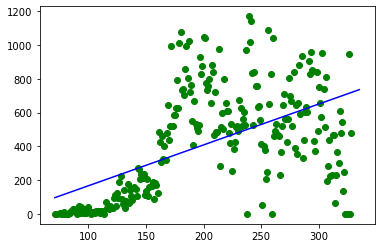

In [8]:
#Graficar
plt.scatter(x,y,label="Datos Reales",color="green")
x_real = np.array(range(71, 336))
print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='blue')
plt.show()

In [9]:
#Modelo logistico
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos
print(x,y)

[328, 327, 326, 325, 324, 323, 322, 321, 320, 319, 318, 317, 316, 315, 314, 313, 312, 311, 310, 309, 308, 307, 306, 305, 304, 303, 302, 301, 300, 299, 298, 297, 296, 295, 294, 293, 292, 291, 290, 289, 288, 287, 286, 285, 284, 283, 282, 281, 280, 279, 278, 277, 276, 275, 274, 273, 272, 271, 270, 269, 268, 267, 266, 265, 264, 263, 262, 261, 260, 259, 258, 257, 256, 255, 254, 253, 252, 251, 250, 249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129,

In [11]:
#Modelo logistico:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y)
print(exp_fit)

(array([-2122.84114959,   484.97285312]), array([[40184.59546499, -7646.98374469],
       [-7646.98374469,  1464.29905989]]))


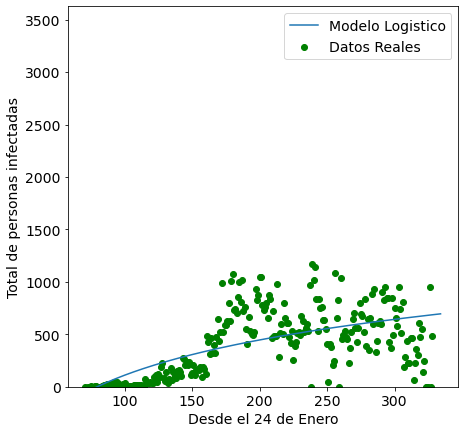

In [13]:
pred_x = list(range(min(x),max(x)+7)) # Predecir 7 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="green")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Inicio del año")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()

In [95]:
# Implementar modelo exponencial
def modelo_exponencial(x, a, b,c):
    return a * np.exp(b*(x - c))

popt, pcov = curve_fit(modelo_exponencial, x, y, maxfev=6000)
print(popt)

[ 1.67729833e+02  4.25586630e-03 -2.40415246e+00]


[ 1.67729833e+02  4.25586630e-03 -2.40415246e+00]
Modelo de prediccion EXPONENCIAL
Total infectados del dia 335: 708.0


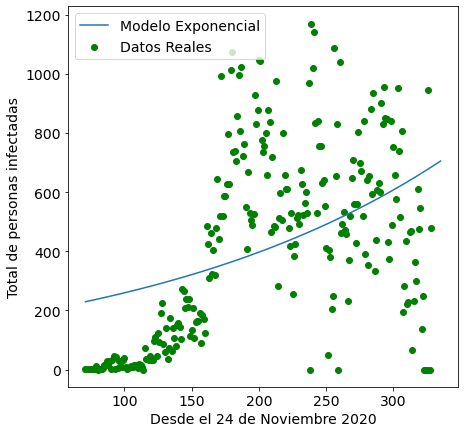

In [104]:
# Implementar
def modelo_exponencial(x, a, b,c):
    return a * np.exp(b*(x - c))

popt, pcov = curve_fit(modelo_exponencial, x, y, maxfev=6000)
print(popt)
pred_x = np.array(range(71,336)) # Predecir 
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)

plt.scatter(x,y,label="Datos Reales",color="green")
plt.plot(pred_x, [modelo_exponencial(i,popt[0],popt[1],popt[2]) for i in pred_x], label="Modelo Exponencial" )
print("Modelo de prediccion EXPONENCIAL")
print("Total infectados del dia 335:",round(modelo_exponencial(336,popt[0],popt[1],popt[2])))
plt.legend()
plt.xlabel("Desde el 24 de Noviembre 2020")
plt.ylabel("Total de personas infectadas")
plt.show()
print()

# Modelo polinomial


La prediccion polinomial es  8
Infectados en el dia 336: 768.0


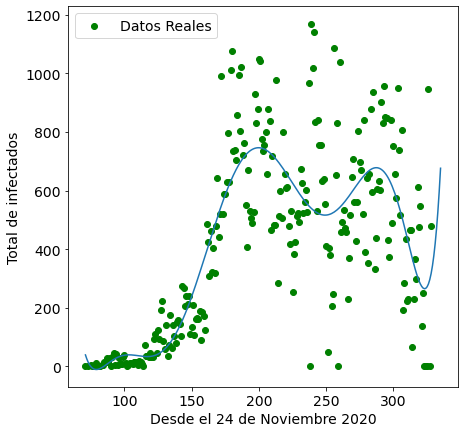

In [103]:
# Implementar
modelo_polinomial = {}
prediccion = 0

for grado in range(8,9):
    resultados_modelo = np.polyfit(x, y, grado, full=True)
    modelo_polinomial[grado] = resultados_modelo

plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
plt.scatter(x,y,label="Datos Reales",color="green")

prediccion_x = np.array(range(71,336))
for grado, modelo in modelo_polinomial.items():
    coeficientes, error, *_ = modelo
    prediccion = np.poly1d(coeficientes)
    print("La prediccion polinomial es ",grado)
    print("Infectados en el dia 336:",round(prediccion(336)))
    plt.plot(prediccion_x, prediccion(prediccion_x) )
plt.legend()
plt.xlabel("Desde el 24 de Noviembre 2020")
plt.ylabel("Total de infectados")
plt.show()

In [17]:
url = ('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/data.csv')
df = pd.read_csv(url)
df = df.loc[:,['dateRep','cases']]
FMT = '%d/%m/%Y'
date = df['dateRep']
df['dateRep'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("01/01/2020", FMT)).days)
df= df[df["cases"] > 0.0]
df

,dateRep,cases
0,328,246
1,327,252
2,326,154
3,325,232
4,324,282
...,...,...
57631,88,2
57632,87,2
57634,85,1
57638,81,1


Text(0.5, 1.0, 'Datos de contagiados')

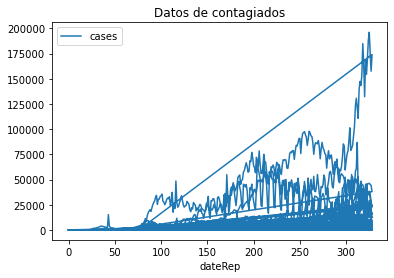

In [18]:

df.plot(x ='dateRep', y='cases')
plt.title("Datos de contagiados")

In [20]:
filtro = df["cases"] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print('Mediana', mediana)
print('Media', media)

Mediana 86.0
Media 1512.7847507331378


In [21]:
#Vamos a comprobar:
# según la media y la mediana podemos obtener la taza de crecieminto y predicir su comportamiento.
# Cargamos los datos de total de casos
y = list(df.iloc [:, 1]) # Total casos
x = list(df.iloc [:, 0]) # Dias
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

87


En 7 dias el numero de casos es 603


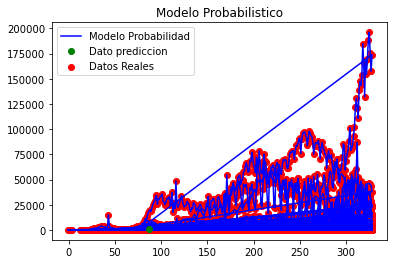

In [22]:
# Quiero predecir cuántos "Casos" voy a obtener de aqui a 7 dias.
plt.scatter(x, y,label="Datos Reales", color='red')
plt.plot()
for i in range(x[-1]+1, x[-1]+8):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x,y,label="Modelo Probabilidad", color="blue")
print('En 7 dias el numero de casos es', y[-1])
plt.plot(x[-1],y[-1],'go', label='Dato prediccion')
plt.legend()
plt.title("Modelo Probabilistico")
plt.show()

<h1>Conclusiones:</h1>

<p>La mejor prediccion la tiene el modelo logistico o polinomial, ya que los datos se acercan mas, aunque es bastante inexacto ya que los datos que tenemos de contagiados, no son uniformes es decir los datos que da el organismo encargado no tiene tendencia alguna, varia muchisimo hay dias que sube demasiado, y otros no tienen.</p>

<h1>Ventajas de los modelos:</h1>
<p>Las ventajas a la que e llegado es :<br>
Permiten una identificación rápida de las expectativas esperadas<br>
Reducen los riesgos asociados con la experimentación real.<br>
Auxilia el proceso de innovación ya que permite al experimentador observar y jugar con el sistema.</p>

<h1>Desventajas de los modelos:</h1>
<p>Se pierde información (que puede ser relevante) del fenómeno que se esta estudiando.<br>
Las diferentes interpretaciones de la información, pueden ocasionar resultados que estén lejos de la realidad.<br>
La recolección de datos puede ser muy costosa y complicada.<br>
Sensibilidad ante errores de medición; a veces pequeñas variaciones en los datos ocasionan que se tengan resultados opuestos.</p>


<h1>Modelo probabilistico</h1>
<p>El modelo probabilistico se basa en la probabilidad, de que suceda un evento es decir no es exacto, es por ello que suele 
tener un margen de error en los acontesimientos, asunciones o muestras que se realizan.</p>